In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns

In [47]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [48]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
df['target'] = data['target'] # Target refers to the column that we will be predicting
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
#Data Dictionary

# CRIM: per capita crime rate by town.
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of nonretail business acres per town.
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# NOX: nitric oxides concentration (parts per 10 million).
# RM: average number of rooms per dwelling.
# AGE: proportion of owner-occupied units built prior to 1940.
# DIS: weighted distances to five Boston employment centers.
# RAD: index of accessibility to radial highways.
# TAX: full-value property-tax rate per $10,000.
# PTRATIO: pupil-teacher ratio by town.
# B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
# LSTAT: % lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s. Target

In [51]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


## Remember that features and EDA should be done on train data only!!

In [52]:
# BINNING


# First type of features that you can make is do binning of a continuous variable to convert it into categorical.

x_train['age_bins'] = pd.qcut(x_train['AGE'],q=4,labels=[1,2,3,4])
x_train['age_bins'].head()

346    2
504    3
317    2
461    3
401    4
Name: age_bins, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [ ]:
# How to map these bins to test??
# That is something that you have to figure out on your own!!

In [53]:
# BINARIZATION

x_train['NOX'].describe()

count    404.000000
mean       0.557190
std        0.116915
min        0.385000
25%        0.453000
50%        0.538000
75%        0.625750
max        0.871000
Name: NOX, dtype: float64

In [54]:
# Here NOX means nitric oxide concentration. So we can create a feature that tells whether the NOX value is above threshold or not

x_train['is_NOX_high'] = np.where(x_train['NOX']>0.535,1,0)
x_train[['NOX','is_NOX_high']]

,NOX,is_NOX_high
346,0.4420,0
504,0.5730,1
317,0.5440,1
461,0.7130,1
401,0.6930,1
...,...,...
343,0.4840,0
344,0.4840,0
115,0.5470,1
331,0.4379,0


In [55]:
# LOG TRANSFORMATION

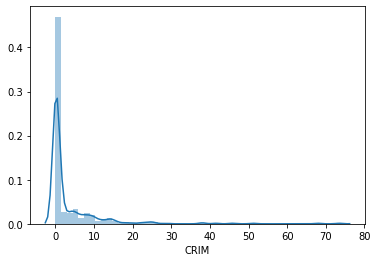

In [56]:
sns.distplot(x_train['CRIM'])

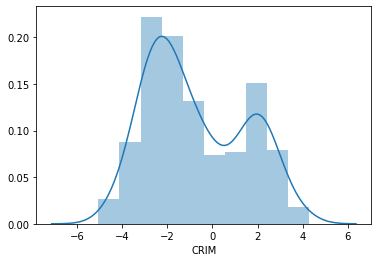

In [57]:
sns.distplot(np.log(x_train['CRIM']))

In [58]:
# If you look above,by doing the log transformation,we were able to drive the feature to a near normal distribution
# And normal distribution makes it easier for the model to learn patterns!.

In [59]:
# ENCODING - TARGET/NON TARGET

# These features are basically a groupby on a categorical column and then a subsequent agg on some continuous column

# NOTE THAT THESE SHOULD BE MADE ON TRAIN AND MAPPED TO VAL AND TEST!!!

mapper = x_train.groupby('CHAS')['CRIM'].mean().to_dict() # average crime rate per CHAS value
mapper

# Notice above, groupby is done on train only and not on entire data!

{0.0: 3.7409296551724154, 1.0: 1.9537266666666662}

In [60]:
x_train['chas_avg_crim'] = x_train['CHAS'].map(mapper)
x_test['chas_avg_crim'] = x_test['CHAS'].map(mapper)

In [61]:
x_train['chas_avg_crim'].head()

346    3.74093
504    3.74093
317    3.74093
461    3.74093
401    3.74093
Name: chas_avg_crim, dtype: float64

In [62]:
x_test['chas_avg_crim'].head()

280    3.74093
232    3.74093
204    3.74093
150    3.74093
486    3.74093
Name: chas_avg_crim, dtype: float64

In [63]:
# TARGET ENCODING

# IT is the same as above but the continuos variable will be the target column

x_train['target'] = y_train # adding it again for demonstration of target encoding

target_mapper = x_train.groupby('CHAS')['target'].mean().to_dict()
print(target_mapper)

x_train.drop('target',axis=1,inplace=True) # Removing it back

{0.0: 21.783023872679045, 1.0: 27.05925925925926}


In [64]:
x_train['avg_price_chas'] = x_train['CHAS'].map(target_mapper)
x_test['avg_price_chas'] = x_test['CHAS'].map(target_mapper)

In [ ]:
# Couple of more feature engineering ideas

# 1. Using date decomposition features like day,month,week
# 2. Addition/Subtraction/Multiplication of features with proper reasoning